# CS231a PSET 3 Problem 4: Monocular Depth Estimation

Building on the idea of learning useful representations for downstream tasks we saw in the last problem, in this problem you will see how this can be done for the task of monocular depth estimation.

**Using a GPU**. Make sure to first change your runtime to use a GPU: click Runtime -> Change runtime type -> Hardware Accelerator -> GPU and your Colab instance will automatically be backed by GPU compute.

Now, let's download the [NYU Depth dataset](https://cs.nyu.edu/~silberman/datasets/nyu_depth_v2.html) we'll be working with. First, you should upload the 'problem4' directory as well as the 'checkpoints' and 'examples' directories onto a location of your choosing in Drive and run the following to have access to the code within it:

In [10]:
# from google.colab import drive

# drive.mount('/content/drive', force_remount=True)

# # enter the foldername in your Drive where you have saved the unzipped
# # 'pset3/problem4' folder containing the '.py' files needed for this problem
# # e.g. 'cs231a/monocular_depth_estimation'
# FOLDERNAME = None

# assert FOLDERNAME is not None, "[!] Enter the foldername."

# %cd drive/My\ Drive
# %cp -r $FOLDERNAME/problem4/download_data.py ../../
# %cd ../../

!python problem4/download_data.py

# %cd drive/My\ Drive
# %cd $FOLDERNAME

Dataset zip exists


If all is set up correctly, you should now get the 4.4G dataset stored in this Colaborotary runtime. Note that you'll need to redownload this data whenever you reconnect to a fresh runtime!

# Checking out the data

Let's start by having a look at what's in the NYU dataset. For that, finish the marked sections in data.py, and then run the following code:


Loading dataset zip file...Loaded (50688).


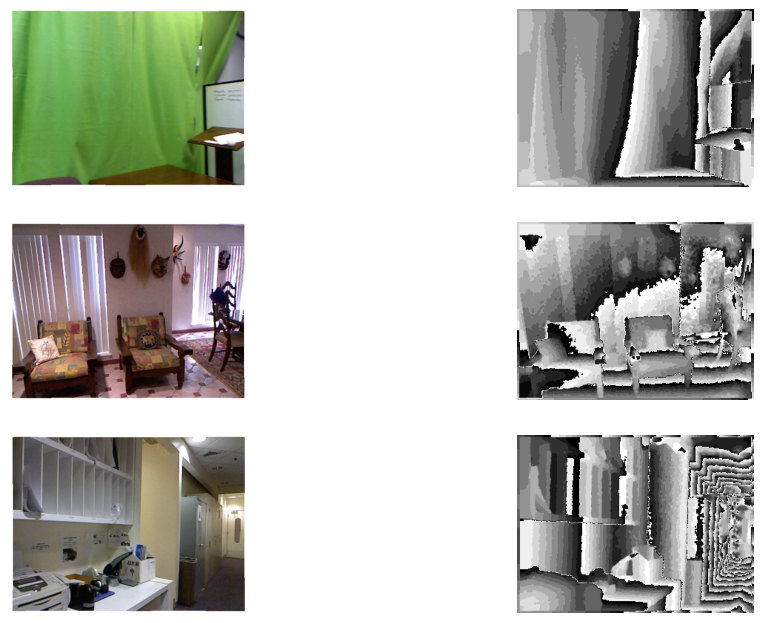

In [1]:
from problem4.data import get_data_loaders 
import matplotlib.pyplot as plt
import torchvision
import gc

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

tensorToImage = torchvision.transforms.ToPILImage()
trainloader, testloader = get_data_loaders("data/nyu_depth.zip", 
                                           batch_size=4)
dataiter = iter(trainloader)
fig, axs = plt.subplots(3, 2)
for i in range(3):
    data = next(dataiter)
    axs[i, 0].imshow(tensorToImage(data['image'][0]))
    axs[i, 1].imshow(tensorToImage(data['depth'][0]), cmap='gray')
    axs[i, 0].axis('off')
    axs[i, 1].axis('off')

# Training the model

Next, we can go ahead and train the model once you complete the appropriate parts of losses.py and training.py. Let's just train for one epoch first (this will take around 3 hours!):

Before we run training, let's visualize the training progress using [Tensorboard](https://www.tensorflow.org/tensorboard). When you run the following, you should see the scalars tab showing the loss gradually going down once training starts. If you go to the 'images' tab, you can also be able to observe the 'Ours' images getting better over time, with the 'Diff' images showing less disparity from the ground truth over time:

In [2]:
# !pip install tensorboardX
# %load_ext tensorboard
# %tensorboard --logdir runs/

In [2]:
import problem4.training 
from importlib import reload  
problem4.training = reload(problem4.training)#reload when debugging to have updated code
problem4.training.train(1, trainloader, testloader, lr=0.0001, pretrained=True)

Initializing fresh model ...
Starting training ... 
Epoch: #0 Batch: 0/12672	Time (current/total) 0.369/0.369	eta 1:17:55	LOSS (current/average) 0.9709/0.9709	
Epoch: #0 Batch: 5/12672	Time (current/total) 0.326/3.425	eta 1:08:44	LOSS (current/average) 0.9519/1.0011	
Epoch: #0 Batch: 10/12672	Time (current/total) 0.338/5.110	eta 1:11:21	LOSS (current/average) 0.6622/0.9068	
Epoch: #0 Batch: 15/12672	Time (current/total) 0.332/6.794	eta 1:10:00	LOSS (current/average) 0.6894/0.8352	
Epoch: #0 Batch: 20/12672	Time (current/total) 0.337/8.474	eta 1:10:58	LOSS (current/average) 0.7570/0.7942	
Epoch: #0 Batch: 25/12672	Time (current/total) 0.358/10.265	eta 1:15:28	LOSS (current/average) 0.5570/0.7652	
Epoch: #0 Batch: 30/12672	Time (current/total) 0.365/12.063	eta 1:16:50	LOSS (current/average) 0.5482/0.7390	
Epoch: #0 Batch: 35/12672	Time (current/total) 0.337/13.825	eta 1:11:01	LOSS (current/average) 0.5747/0.7179	
Epoch: #0 Batch: 40/12672	Time (current/total) 0.348/15.524	eta 1:13:17	LOS

# Testing the trained model

Now that the model has trained (for only one epoch!), we can take a look at how good it is at predicting depth given RGB images. Finish the relevant parts of testing.py and run the following:

Using device: cuda
model load from checkpoint complete ...
Begin Test Loop ...
Processing examples/312_image.png done.
Processing examples/119_image.png done.
Processing examples/267_image.png done.
Processing examples/11_image.png done.
Processing examples/308_image.png done.
Processing examples/626_image.png done.
Processing examples/1_image.png done.
Processing examples/499_image.png done.
Processing examples/470_image.png done.
Processing examples/140_image.png done.
Processing examples/358_image.png done.
Processing examples/377_image.png done.


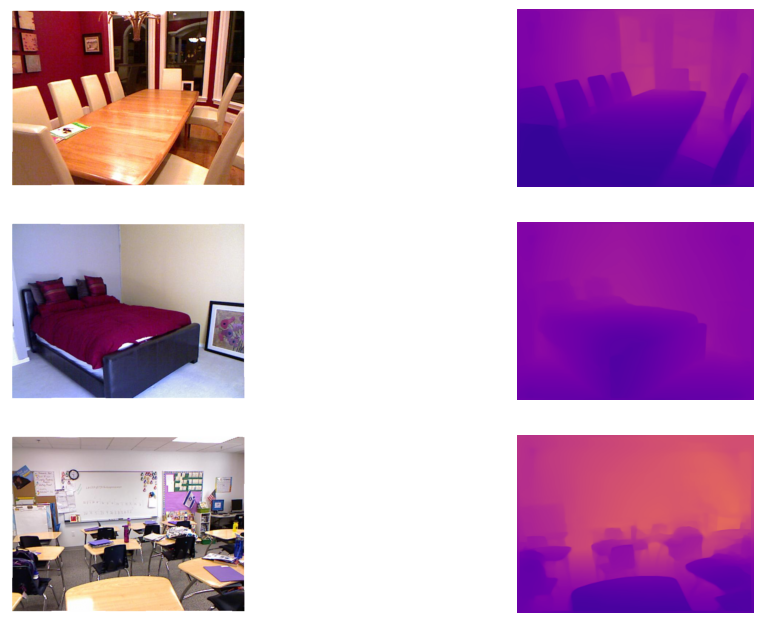

In [3]:
import problem4.testing
problem4.testing = reload(problem4.testing)

problem4.testing.test('checkpoints/ckpt_0_pretrained.pth')

# Training without feature transfer

Now let's see what happens if we train without transferring over features. We will once again load up Tensorboard and then start training, and can observe the difference in the loss function and image quality between the two ways of training:

In [ ]:
# %tensorboard --logdir runs/

In [5]:
problem4.training = reload(problem4.training)#reload when debugging to have updated code
problem4.training.train(1, trainloader, testloader, lr=0.0001, pretrained=False)

Initializing fresh model ...
Starting training ... 
Epoch: #0 Batch: 0/12672	Time (current/total) 0.351/0.351	eta 1:14:02	LOSS (current/average) 1.0619/1.0619	
Epoch: #0 Batch: 5/12672	Time (current/total) 0.326/3.184	eta 1:08:45	LOSS (current/average) 0.9448/0.9898	
Epoch: #0 Batch: 10/12672	Time (current/total) 0.329/4.830	eta 1:09:30	LOSS (current/average) 0.6964/0.8881	
Epoch: #0 Batch: 15/12672	Time (current/total) 0.326/6.489	eta 1:08:49	LOSS (current/average) 0.6554/0.8379	
Epoch: #0 Batch: 20/12672	Time (current/total) 0.325/8.137	eta 1:08:32	LOSS (current/average) 0.6934/0.7992	
Epoch: #0 Batch: 25/12672	Time (current/total) 0.331/9.805	eta 1:09:46	LOSS (current/average) 0.5699/0.7580	
Epoch: #0 Batch: 30/12672	Time (current/total) 0.321/11.463	eta 1:07:41	LOSS (current/average) 0.7755/0.7424	
Epoch: #0 Batch: 35/12672	Time (current/total) 0.339/13.168	eta 1:11:23	LOSS (current/average) 0.6957/0.7291	
Epoch: #0 Batch: 40/12672	Time (current/total) 0.328/14.830	eta 1:09:00	LOSS

Using device: cuda
model load from checkpoint complete ...
Begin Test Loop ...
Processing examples/312_image.png done.
Processing examples/119_image.png done.
Processing examples/267_image.png done.
Processing examples/11_image.png done.
Processing examples/308_image.png done.
Processing examples/626_image.png done.
Processing examples/1_image.png done.
Processing examples/499_image.png done.
Processing examples/470_image.png done.
Processing examples/140_image.png done.
Processing examples/358_image.png done.
Processing examples/377_image.png done.


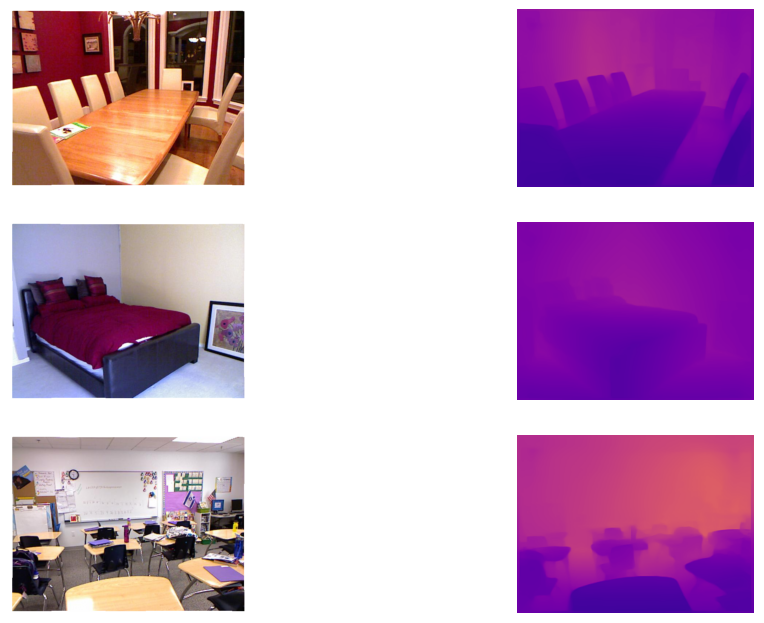

In [6]:
problem4.testing.test('checkpoints/ckpt_0_not_pretrained.pth')

# Conclusion

That's it! You have now trained a model for monocular depth estimation, and saw how transfer learning of learned features can result in better convergence compared to learning from scratch. As noted in the PDF, you now just need to download this notebook to submit alongside your python files.

Credits: this assignment was adapted from [this](https://github.com/pranjaldatta/DenseDepth-Pytorch) code base.
